In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from numpy import polyfit, poly1d, linspace, argwhere
import glob
import numpy as np
import os
from radicl.radicl import RADICL

## CODE DESCRIPTION
Runs data aqusition for RAD probe, plots data, option to comment and save file. To use, run all functions then execute run() functions. 

**must have radicl library downloaded, and correct driver.**

Author: Anna Valentine, annadigssnow@gmail.com

## FUNCTIONS

In [2]:
def list_files_local(path):
    """ Get file list form local folder. """
    from glob import glob
    return glob(path)

In [3]:
def data_collection(cli):

    cli.take_a_reading()

    # Extract raw data as a datafram

    data = cli.grab_data('rawsensor')


    #Grab Depth......but might need recalculation
    depth = cli.grab_data('filtereddepth')['filtereddepth']

    # Grab accelerometer data
    acc = cli.grab_data('rawacceleration')['Y-Axis']


    # Set the 0 point of depth to the Starting point or the snow Surface (This could be reworked)
    depth = depth - depth.values.min()

    # Invert Depth so bottom is negative max depth
    depth = depth - depth.values.max()

    ### Concatenate into one dataframe
    data['acc'] = acc
    data['depth'] = depth

    ## Finally, get default filename
    filename = cli.get_default_filename()

    print("DATA COLLECTED")
    
    return data, filename

In [4]:
### to add a comment to top of file
def prepend_line(file_name, line):
    """ Insert given string as a new line at the beginning of a file """
    # define name of temporary dummy file
    dummy_file = file_name + '.bak'
    # open original file in read mode and dummy file in write mode
    with open(file_name, 'r') as read_obj, open(dummy_file, 'w') as write_obj:
        # Write given line to the dummy file
        write_obj.write(line + '\n')
        # Read lines from original file one by one and append them to the dummy file
        for line in read_obj:
            write_obj.write(line)
    # remove original file
    os.remove(file_name)
    # Rename dummy file as the original file
    os.rename(dummy_file, file_name)

In [5]:
## plot the file that we just took data from 
def plot_file_raw(data):
    
    df = data.copy()
    
    p1 = [1.60168e-06, -7.32247e-03, 0.401, 21515.1]
    p_olddata = [1.22E-6, -1.13886E-2, 26.343, -2927.6]
    poly = poly1d(p1)

    sensor = poly(df['Sensor1'])


    meas_time = len(df['Sensor1']) / 1000 # Sample rate used by accident this day! UGH!
    accel_norm = (df['acc'] +  1).abs()
    
    #fig, axes = plt.subplots(ncols=2)

    # Plot hardness sensor with accel
    plt.figure(figsize=(10, 10))
    
    #ax = axes[0]
    plt.subplot(221)
    time = linspace(0, meas_time, len(df['Sensor1']))
    
    plt.plot(df['Sensor1'], time,'k',label='Force Raw')
    plt.plot(sensor, time, 'b', label="Force")    #### added in line
    plt.ylabel("Time Index")
    plt.xlabel("Force Raw Signal")
    plt.title("Force ")
    plt.gca().invert_yaxis()
    plt.legend()
    #ax1 = ax.twinx()

    plt.subplot(222)
    plt.title("Acceleration")
    plt.ylabel("Time Index")
    plt.xlabel("Acceleration (cm/s)")
    #time = linspace(0,meas_time, len(df['acceleration']))
    plt.plot((df['acc'] +  1).abs(), time,'b',label='accleration')
    plt.gca().invert_yaxis()
    
    plt.subplot(223)
    plt.title("Active/Near NIR")
    plt.ylabel("Time Index")
    plt.xlabel("NIR")
    #time = linspace(0,meas_time, len(df['Sensor2']))
    plt.plot(df['Sensor2'], time+ 0.5, label = "Ambient NIR")
    plt.plot(df['Sensor3'], time+ 0.5, label = "Active NIR")
    plt.legend()
    plt.gca().invert_yaxis()
    
    
    plt.subplot(224)
    plt.plot(df['depth'], time,'k',label='Depth (cm)')
    plt.ylabel("Time Index")
    plt.xlabel("Depth")
    plt.title("Depth Check ")
    plt.legend()
    #ax1 = ax.twi
    
    
    plt.tight_layout()

    plt.show()

In [6]:
### OPTION TO SAVE FILE
def save_file(data, filename, headNote='Notes: '):
    
    ### Save to a .csv
    root_folder = 'RAD_DATA/'

    ### To a filename
    filename = root_folder + '/' + filename[2:]
    data.to_csv(filename)


    ## Add a header note if needed 
    prepend_line(filename, headNote)
    
    print("File Saved: ", filename)


In [7]:
## runs all functions
def run():
    
    # Instantiate the CLI
    cli = RADICL()

    # Isolate the probe for ease of use
    probe = cli.probe
    
    take_measurement=True
    
    while (take_measurement):
        
         # Confirm the probe clear of previous data
        probe.resetMeasurement()


        data, filename = data_collection(cli)

        ### Plotting code to check data
        plot_file_raw(data)

        ### Ask if save?
        user_input = input("Save File?: ")
        if user_input == ("y"):
            save=True
        elif user_input == ("n"):
            save=False

        if save:

            #ask for header note
            headNote = input("header note:")

            save_file(data, filename, headNote)

        ### Ask to continue:
        user_input = input("CONTINUE?: ")
        if user_input == ("y"):
            take_measurement=True
        elif user_input == ("n"):
            take_measurement=False
            
    
    
    ##loop is broken
    print("PROCESS ENDED") 

## TAKE MEASUREMENT

radicl.serial INFO No COM port provided. Scanning for COM ports...
radicl.api INFO Attached device: PB3, Rev=1, FW=1.46.2.0
radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 1
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 122848 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 588 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 797 samples of Acceleration data...


DATA COLLECTED


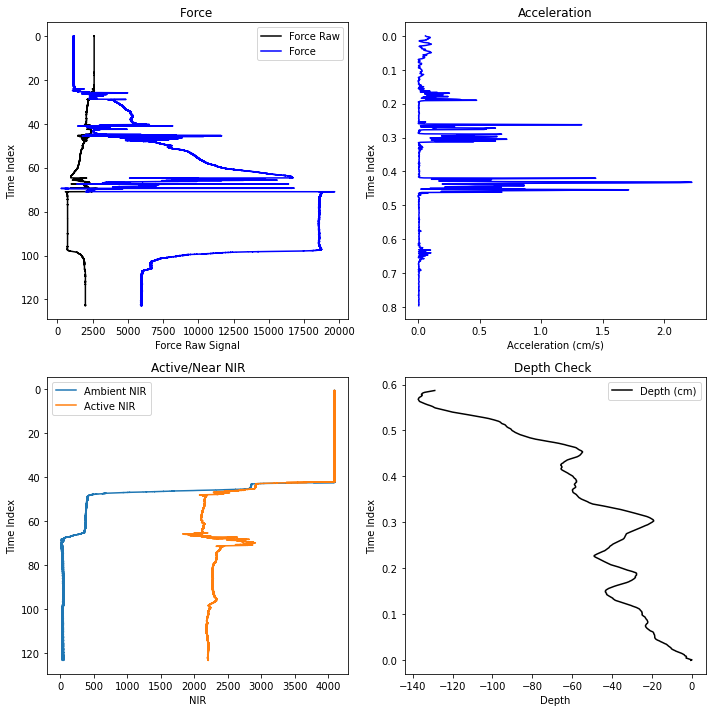

Save File?: y
header note:next to rock, first attempt, crusty snow, bad penetration
File Saved:  RAD_DATA//2021-12-04--120232.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 3
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 160128 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 728 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 989 samples of Acceleration data...


DATA COLLECTED


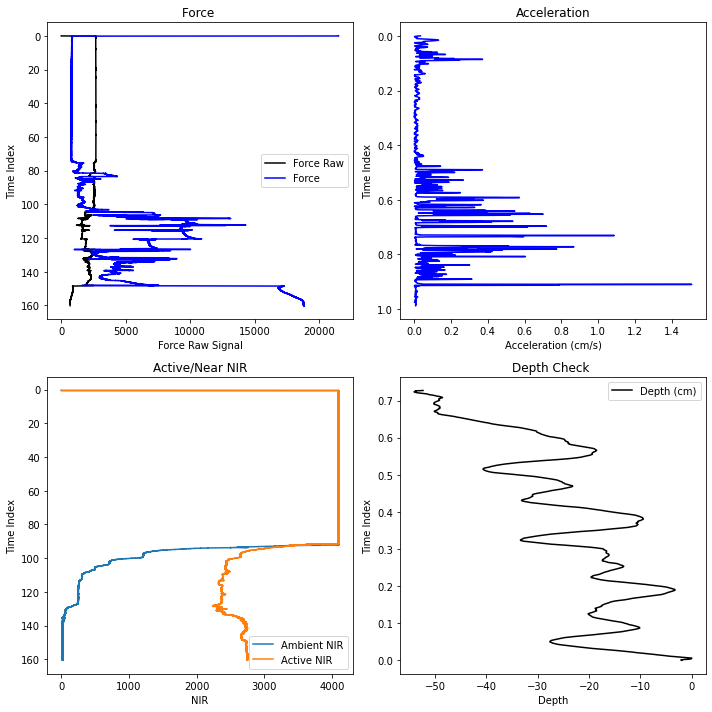

Save File?: y
header note:take 2, in sun near rock, slow measurement
File Saved:  RAD_DATA//2021-12-04--120753.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 1
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 138592 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 663 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 901 samples of Acceleration data...


DATA COLLECTED


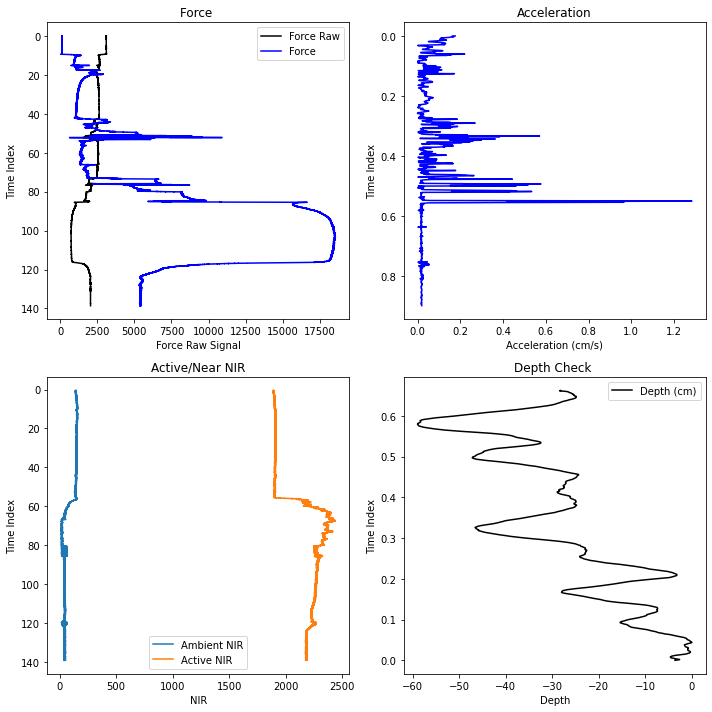

Save File?: y
header note:shadey area, 20cm 
File Saved:  RAD_DATA//2021-12-04--121317.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 3
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 160128 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 727 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 990 samples of Acceleration data...


DATA COLLECTED


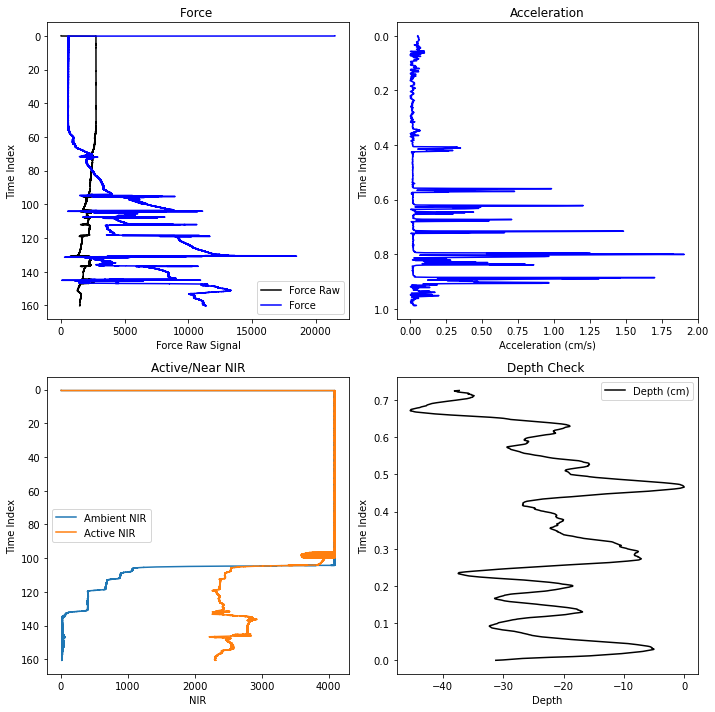

Save File?: 40cm, example of file where force doesn't max at end. in sun, crusty
header note:40cm, example of file where force doesn't max at end, sun crusty
File Saved:  RAD_DATA//2021-12-04--121817.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 3
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 153696 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 735 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 1000 samples of Acceleration data...


DATA COLLECTED


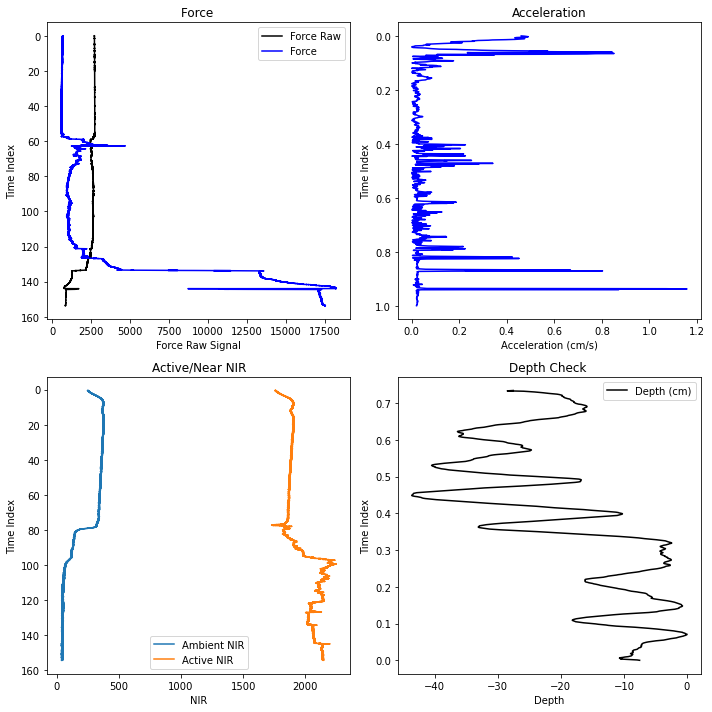

Save File?: y
header note:15cm across road, soft snow
File Saved:  RAD_DATA//2021-12-04--122332.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 3
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 153600 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 734 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 1000 samples of Acceleration data...


DATA COLLECTED


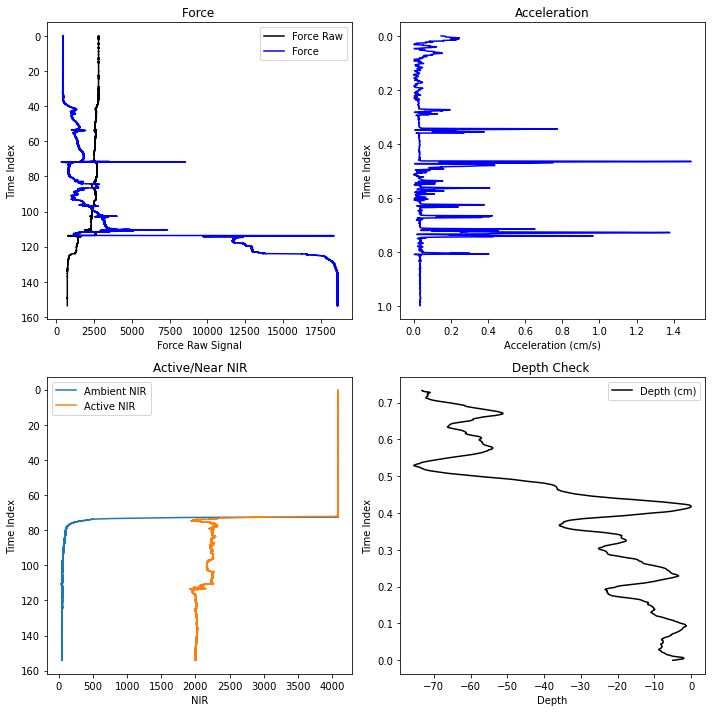

Save File?: y
header note:40cm, sun crust to facets, measure 6
File Saved:  RAD_DATA//2021-12-04--122834.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 3
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 153696 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 735 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 1000 samples of Acceleration data...


DATA COLLECTED


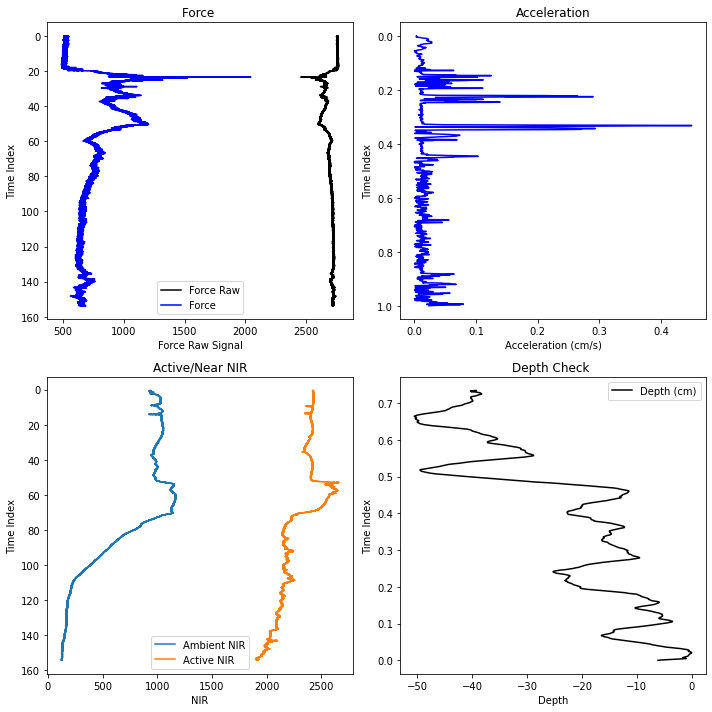

Save File?: y
header note:20cm, sunnyish, tried to go very slowly at surface
File Saved:  RAD_DATA//2021-12-04--123348.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 1
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 145056 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 694 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 943 samples of Acceleration data...


DATA COLLECTED


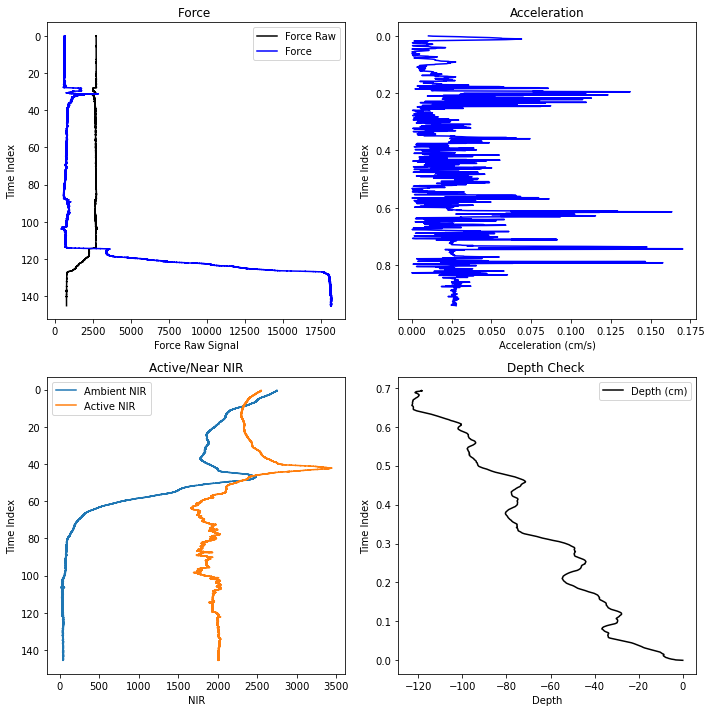

Save File?: y
header note:20cm, slow at top could be reason for weird NIR response
File Saved:  RAD_DATA//2021-12-04--123910.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 1
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 111008 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 493 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 669 samples of Acceleration data...


DATA COLLECTED


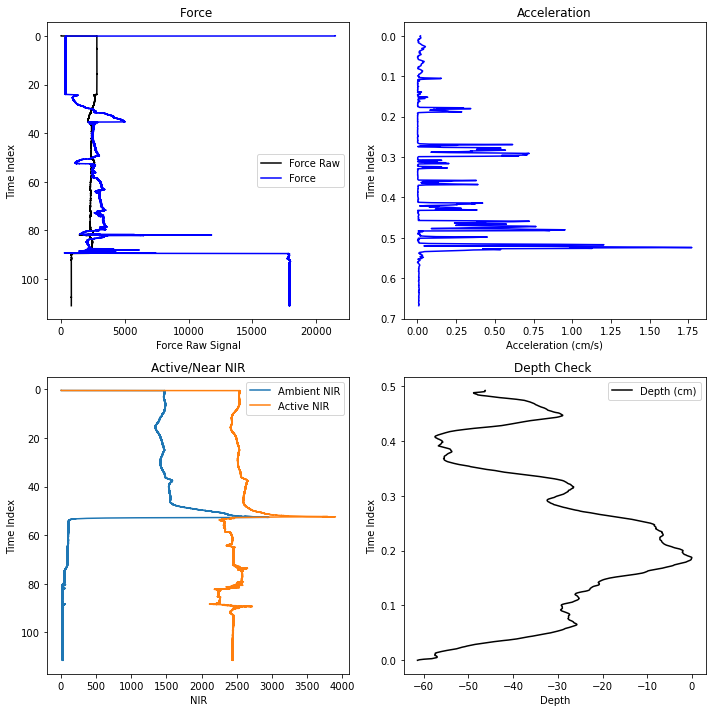

Save File?: y
header note:35cm, weird NIR response? still drop but hmmm
File Saved:  RAD_DATA//2021-12-04--124309.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 1
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 156736 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 712 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 966 samples of Acceleration data...


DATA COLLECTED


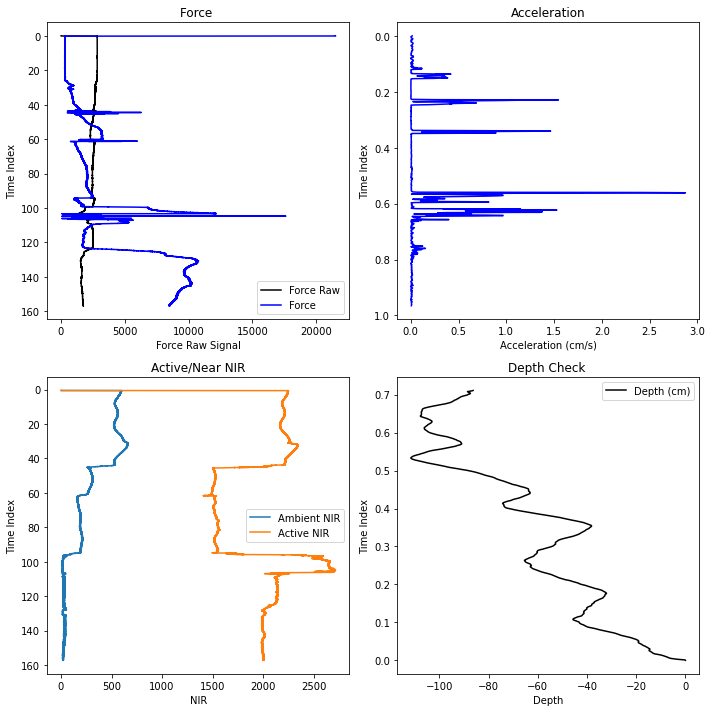

Save File?: y
header note:20cm, crusty NIR OFFF
File Saved:  RAD_DATA//2021-12-04--124756.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 1
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 153216 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 695 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 943 samples of Acceleration data...


DATA COLLECTED


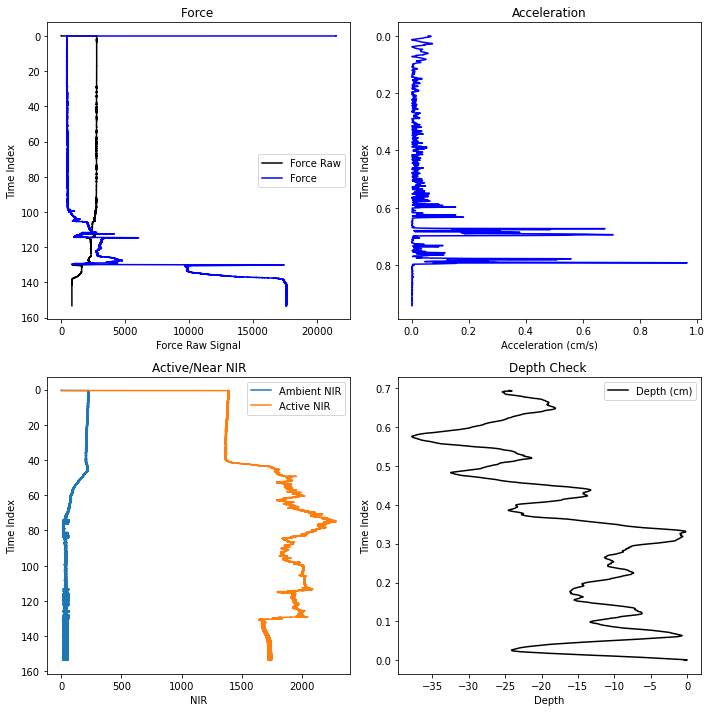

Save File?: y
header note:30cm, ambient response sensible, soft snow, shade
File Saved:  RAD_DATA//2021-12-04--125318.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 3
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 160128 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 729 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 985 samples of Acceleration data...


DATA COLLECTED


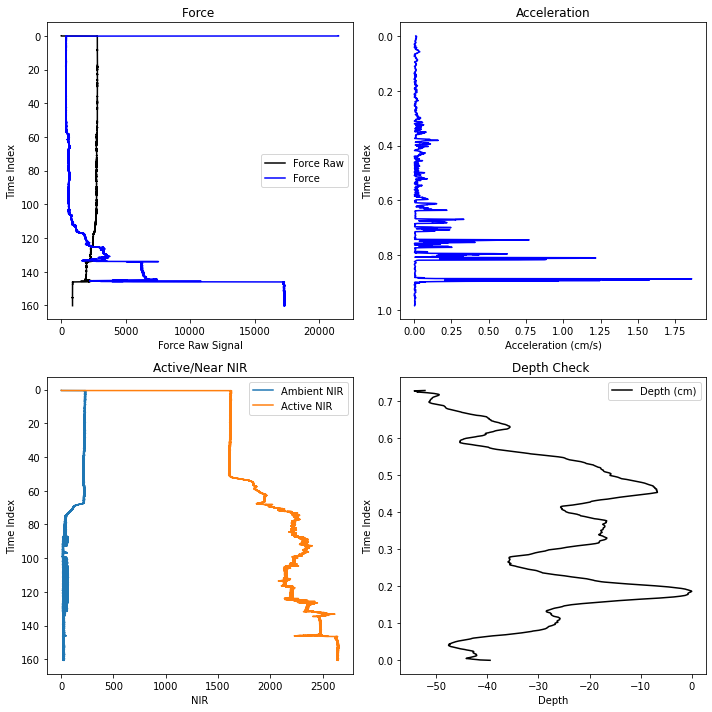

Save File?: y
header note:35cm, soft snow
File Saved:  RAD_DATA//2021-12-04--125739.csv
CONTINUE?: y


radicl.probe INFO Waiting for state 0, current state = 5
radicl.probe INFO Probe measurement reset...


Press any key to begin a measurement.



radicl.probe INFO Waiting for state 1, current state = 1
radicl.probe INFO Measurement started...


Press any key to stop the measurement.



radicl.probe INFO Waiting for state 3, current state = 1
radicl.probe INFO Measurement stopped...
radicl.radicl INFO Downloading rawsensor data from probe...
radicl.probe INFO Querying probe for raw sensor data...
radicl.probe INFO Retrieving 109184 samples of Raw Sensor data...
radicl.radicl INFO Downloading filtereddepth data from probe...
radicl.probe INFO Querying probe for filtered depth data...
radicl.probe INFO Retrieving 523 samples of Filtered Depth data...
radicl.radicl INFO Downloading rawacceleration data from probe...
radicl.probe INFO Querying probe for acceleration data...
radicl.probe INFO Retrieving 707 samples of Acceleration data...


DATA COLLECTED


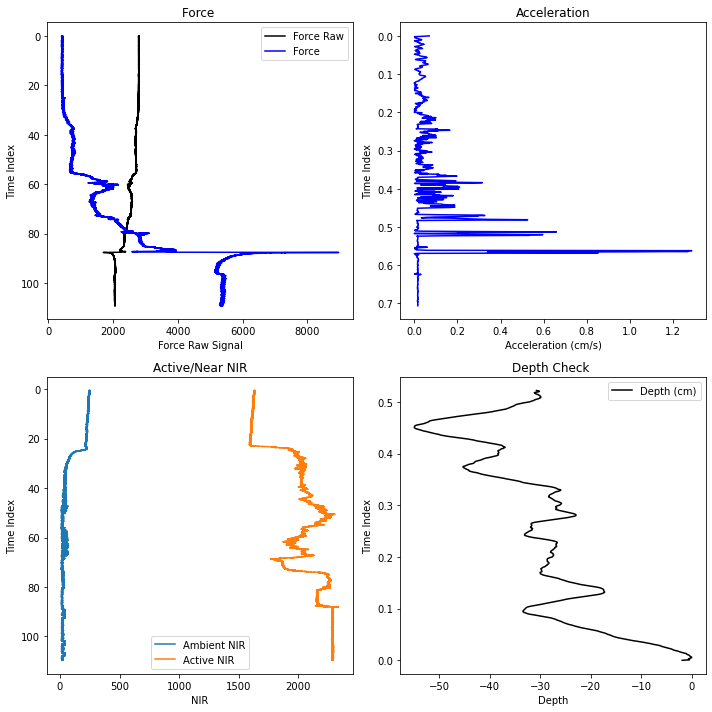

Save File?: y
header note:34cm, shady soft snow
File Saved:  RAD_DATA//2021-12-04--130045.csv
CONTINUE?: n
PROCESS ENDED


In [8]:
run()

### FIELD NOTES
Location: Jones Pass

Snow is not very deep, testing in both sunny and shady areas to see difference of ambient/active NIR.
between 15 and 40cm, 43 degrees out, sunny no wind.

I think this would be more obvious with a deeper snowpack, but it's telling me a lot about how the user could make errors in taking measurements, and how important the code needs to be for cropping data. 

Noticed ice build up on the ambient/active NIR sensors.

Not getting as nice of a curve as I have from Micah's data.....maybe that's because it's a drier snowpack?

